In [1]:
using Revise

In [2]:
using QuantumStates
using UnitsToValue

In [3]:
# Define the operator for the Hamiltonian
H_operator = :(
    T * DiagonalOperator +
    B_Σ * Rotation_Σ +
    B_Δ * Rotation_Δ +
    A_v * SpinOrbit + 
    q_e * (ΛDoubling_q + 2ΛDoubling_p2q) +
    p_e * ΛDoubling_p2q +
    # q_e * (ΛDoubling_q - 2ΛDoubling_p2q) +
    # p_e * (-1 * ΛDoubling_p2q) +
    q_v * ℓDoubling + 
    ϵω2 * RennerTeller + 
    gK * gK_nonadiabatic
    # b00_A * Hyperfine_IF
    # b00_A * Hyperfine_IL
    # b00_A * (Hyperfine_IF - Hyperfine_IL)
);

In [4]:
# Spectroscopic parameters for the A(010) state from Li & Coxon (1995)
# Note that parameters are converted from cm⁻¹ to Hz
parameters = @params begin
    T = 16360.389 * c * 1e2 + 650 * c * 1e2
    B_Σ = 0.3402123 * c * 1e2
    B_Δ = 0.3402609 * c * 1e2
    A_v = 67.0951 * c * 1e2
    q_e = -0.3072e-3 * c * 1e2
    p_e = -0.04472 * c * 1e2
    q_v = -0.6978e-3 * c * 1e2
    ϵω2 = -36.2634 * c * 1e2
    # ϵω2 = 36.2634 * c * 1e2
    gK = 0.5937 * c * 1e2
    b00_A = 1e6
end;

In [5]:
# Define bounds for the quantum numbers that define which states to include in the basis
QN_bounds = (
    label = "A",
    v_1 = 0,
    v_2 = 1,
    ℓ = (-1,1),
    v_3 = 0,
    Λ = (-1,1),
    I = 1/2,
    S = 1/2,
    J = 1/2:11/2
    # J = 1/2:5/2
    )
basis = order_basis_by_m(enumerate_states(HundsCaseA_LinearMolecule, QN_bounds))
;

In [6]:
CaOH_A110 = @time Hamiltonian(basis=basis, operator=H_operator, parameters=parameters)
@time full_evaluate!(CaOH_A110)
@time solve!(CaOH_A110)
;

  5.292188 seconds (64.90 M allocations: 2.425 GiB, 15.64% gc time, 28.97% compilation time)
  4.361154 seconds (63.33 M allocations: 2.191 GiB, 15.45% gc time, 14.01% compilation time)
  0.444393 seconds (213.01 k allocations: 33.290 MiB, 40.42% compilation time)


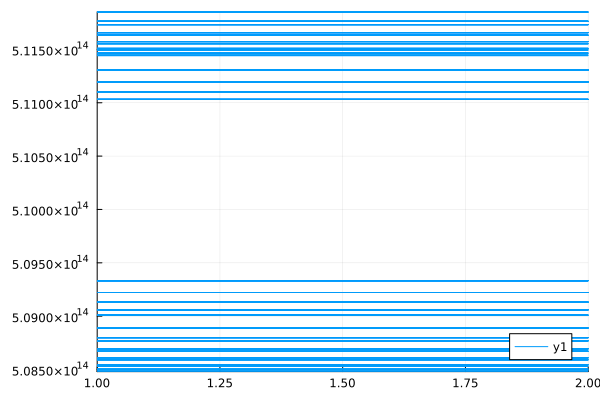

In [7]:
using Plots
hline(energy.(CaOH_A110.states))
# plot!(ylim=(16290, 16425))

In [13]:
@time save_to_file(CaOH_A110, "CaOH_A110", "")

  0.233637 seconds (527.62 k allocations: 32.573 MiB, 70.21% compilation time)


In [9]:
energy(CaOH_A010.states[1]) / (c * 1e2) - (1/2)*(1/2+1)*0.34

LoadError: UndefVarError: `CaOH_A010` not defined

In [10]:
energy(CaOH_A010.states[169]) / (c * 1e2) - (3/2)*(3/2+1)*0.34 + (-(1/4) * ϵ^2 * 353 + (1/2) * A * ( - (1/4) * ϵ^2))

LoadError: UndefVarError: `CaOH_A010` not defined

In [11]:
energy(CaOH_A010.states[329]) / (c * 1e2) - (5/2)*(5/2+1)*0.34 + (-(3/4) * ϵ^2 * 353 + (1/2) * A * ( - (3/4) * ϵ^2))

LoadError: UndefVarError: `CaOH_A010` not defined

In [12]:
energy(CaOH_A010.states[473]) / (c * 1e2) - (1/2)*(1/2+1)*0.34

LoadError: UndefVarError: `CaOH_A010` not defined